In [1]:
%matplotlib nbagg
from binaries import *
from numpy import random as rnd

Pasos a realizar:
1. Generar una separación y velocidades relativas en 3D
2. Proyectar en a.r y dec.
3. Colocar el sistema en un punto al azar en el espacio

Primero se genera una lista con una distribución de separaciones

In [2]:
sample = 9999

#Crear un arrelgo de vectores de longitud hasta ~1.2 pc
seps = rnd.exponential(0.5,sample)
#eps = rnd.exponential(0.3,sample)
pos = np.array([seps,np.zeros(sample),np.zeros(sample)]).transpose()
#velocidad circular newtoniana v=92.7*(s/pc)**-1/2 m/s
vel = np.array([92.74*(seps)**(-0.5),np.zeros(sample), np.zeros(sample)]).transpose()

# Girar los vectores de manea aleatoria (scramble)
for i in range(len(pos)):
    pos[i] = rot_y(rot_z(pos[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)
    vel[i] = rot_y(rot_z(vel[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)

###########################################################
#Ahora, creamos las posiciones de las estrellas primarias
distance = 100 #parsec
#Todas a la misma distancia
pri_pos = np.array([distance*np.ones(sample),np.zeros(sample),np.zeros(sample)]).transpose()
#Con distribucion de velocidades promedio de 30km/s
pri_vel = np.array([30000*rnd.randn(sample),
                   np.zeros(sample),np.zeros(sample)]).transpose()

# Girar los vectores de manea aleatoria (scramble)
for i in range(len(pri_pos)):
    pri_pos[i] = rot_y(rot_z(pri_pos[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)
    pri_vel[i] = rot_y(rot_z(pri_vel[i],np.arcsin(2*rnd.rand()-1)*180/np.pi),rnd.rand()*360)
#pd.DataFrame()

#Posiciones y velocidades de las secundarias
sec_pos = pri_pos + pos
sec_vel = pri_vel + vel

# Combinar las tablas
#pd.DataFrame(pri_pos)
data = pd.merge( pd.merge(pd.DataFrame(pri_pos,columns=['x1','y1','z1']),
                          pd.DataFrame(pri_vel,columns=['vx1','vy1','vz1']),
                          left_index=True, right_index=True),
                pd.merge(pd.DataFrame(sec_pos,columns=['x2','y2','z2']),
                         pd.DataFrame(sec_vel,columns=['vx2','vy2','vz2']),
                         left_index=True, right_index=True),
                left_index=True, right_index=True)


In [4]:
data['xy_sep'] = np.sqrt((data.x2-data.x1)**2+(data.y2-data.y1)**2)
data['yz_sep'] = np.sqrt((data.y2-data.y1)**2+(data.z2-data.z1)**2)
data['zx_sep'] = np.sqrt((data.z2-data.z1)**2+(data.x2-data.x1)**2)

data['dvx'] = data.vx2-data.vx1
data['dvy'] = data.vy2-data.vy1
data['dvz'] = data.vz2-data.vz1

#Add errors
data['x1_err'] = 0.1
data['y1_err'] = 0.1
data['z1_err'] = 0.1
data['vx1_err'] = 50
data['vy1_err'] = 50
data['vz1_err'] = 50
data['x2_err'] = 0.1
data['y2_err'] = 0.1
data['z2_err'] = 0.1
data['vx2_err'] = 50
data['vy2_err'] = 50
data['vz2_err'] = 50

data['dvx_err'] = data.vx1_err + data.vx2_err
data['dvy_err'] = data.vy1_err + data.vy2_err
data['dvz_err'] = data.vz1_err + data.vz2_err

In [58]:
print((data.dvx[(data.xy_sep > 0.2) &
          (data.xy_sep < 1.2)]**2).mean(),
(np.random.normal(data.dvx[(data.xy_sep > 0.2) &
                          (data.xy_sep < 1.2)],
                 data.dvx_err[(data.xy_sep > 0.2) &
                              (data.xy_sep < 1.2)])**2).mean())

5798.061441006161 15844.11149629265


In [9]:
np.abs(data.x1).describe()

count    9999.000000
mean       50.221308
std        28.479502
min         0.010654
25%        26.203201
50%        50.560542
75%        74.129817
max        99.971234
Name: x1, dtype: float64

In [112]:
rmin = 0.2
rmax = rmin*10
x = data.dvx[(data.xy_sep > rmin) &
          (data.xy_sep < rmax)]**2
y = (np.random.normal(data.vx2[(data.xy_sep > rmin) &
                                  (data.xy_sep < rmax)],
                         0.5*data.vx2_err[(data.xy_sep > rmin) &
                                      (data.xy_sep < rmax)]) -
     np.random.normal(data.vx1[(data.xy_sep > rmin) &
                                  (data.xy_sep < rmax)],
                         0.5*data.vx1_err[(data.xy_sep > rmin) &
                                      (data.xy_sep < rmax)]))**2

In [15]:
np.sqrt(data.x1**2+data.y1**2).std()

22.525649135799814

<IPython.core.display.Javascript object>


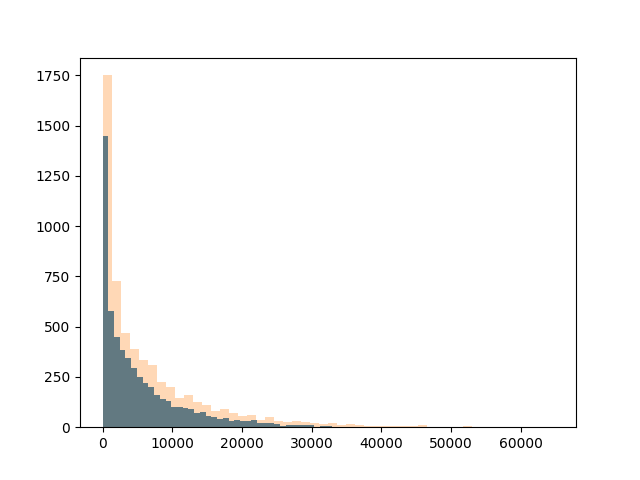

(array([1.751e+03, 7.260e+02, 4.670e+02, 3.910e+02, 3.360e+02, 3.090e+02,
        2.270e+02, 1.990e+02, 1.440e+02, 1.590e+02, 1.260e+02, 1.080e+02,
        8.000e+01, 9.200e+01, 7.000e+01, 5.800e+01, 6.300e+01, 3.800e+01,
        5.100e+01, 2.900e+01, 2.500e+01, 3.200e+01, 2.600e+01, 1.900e+01,
        1.400e+01, 2.200e+01, 1.100e+01, 1.400e+01, 1.300e+01, 6.000e+00,
        5.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 1.000e+01,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([6.26541028e-06, 1.29345466e+03, 2.58690932e+03, 3.88036397e+03,
        5.17381863e+03, 6.46727329e+03, 7.76072794e+03, 9.05418260e+03,
        1.03476373e+04, 1.16410919e+04, 1.29345466e+04, 1.42280012e+04,
        1.55214559e+04, 1.68149105e+04, 1.81083652e+04, 1.94018198e+04,
        2.06952745e+04, 2.19887292e+04, 2.32821838e+04, 2.45756385e+04,
        2.586909

In [114]:
plt.hist(x,bins=50,alpha=1)
plt.hist(y,bins=50,alpha=0.3)

In [82]:
x = pd.DataFrame(np.random.normal(np.ones(999)*10,np.ones(999)))
y = pd.DataFrame(np.random.normal(np.ones(999)*5,np.ones(999))-
                 np.random.normal(np.ones(999)*5,np.ones(999)))
print(x.describe(),y.describe())
#x.hist(bins=20)
#y.hist(bins=20)

                0
count  999.000000
mean    10.046216
std      0.992285
min      7.073389
25%      9.406191
50%     10.005411
75%     10.728103
max     12.879453                 0
count  999.000000
mean     0.070977
std      1.381041
min     -3.871854
25%     -0.884097
50%      0.135465
75%      0.983447
max      4.166516


<IPython.core.display.Javascript object>


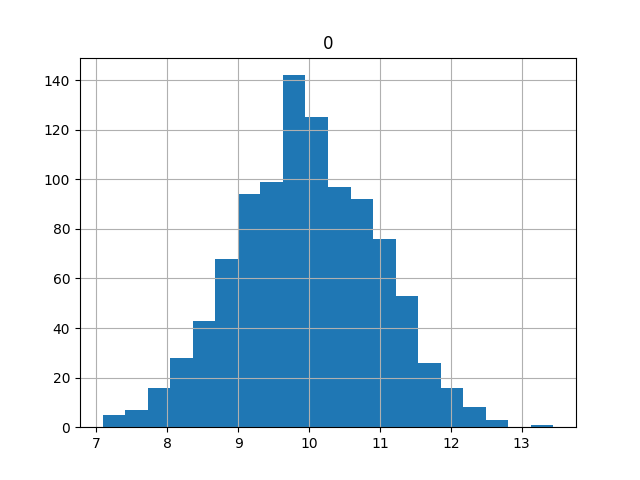

<IPython.core.display.Javascript object>


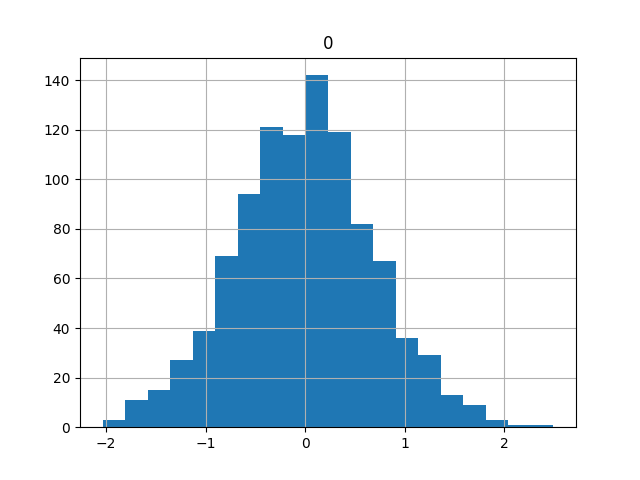

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa515015128>]],
      dtype=object)

In [80]:
x.hist(bins=20)
y.hist(bins=20)

-5.690919502653889 0.6269490340690119 0.6317868536722901 [-5.375026075817744, -4.743239222145454, -4.111452368473164, -3.4796655148008737, -2.8478786611285836, -2.2160918074562934, -1.5843049537840033, -0.9525181001117131, -0.32073124643942297, 0.3110556072328672] [0, 2, 4, 14, 70, 291, 1024, 3208, 4508, 877] [nan, 3804.094503626778, 3291.9208363261137, 2149.9881052252326, 1064.389895401588, 490.18767638699654, 270.70821504840814, 135.7534214791423, 74.23336335883005, 44.05945021039589] [nan, 59.50846546625826, 35.85783707839951, 22.12792620306672, 9.718423416947473, 4.757435160436968, 2.562940200020417, 1.4754719378251988, 1.2576645677023015, 2.91088392160603]
-5.690919502653889 0.6269490340690119 0.6317868536722901 [-5.375026075817744, -4.743239222145454, -4.111452368473164, -3.4796655148008737, -2.8478786611285836, -2.2160918074562934, -1.5843049537840033, -0.9525181001117131, -0.32073124643942297, 0.3110556072328672] [0, 2, 4, 14, 70, 291, 1024, 3208, 4508, 877] [nan, 3804.09450362

<IPython.core.display.Javascript object>


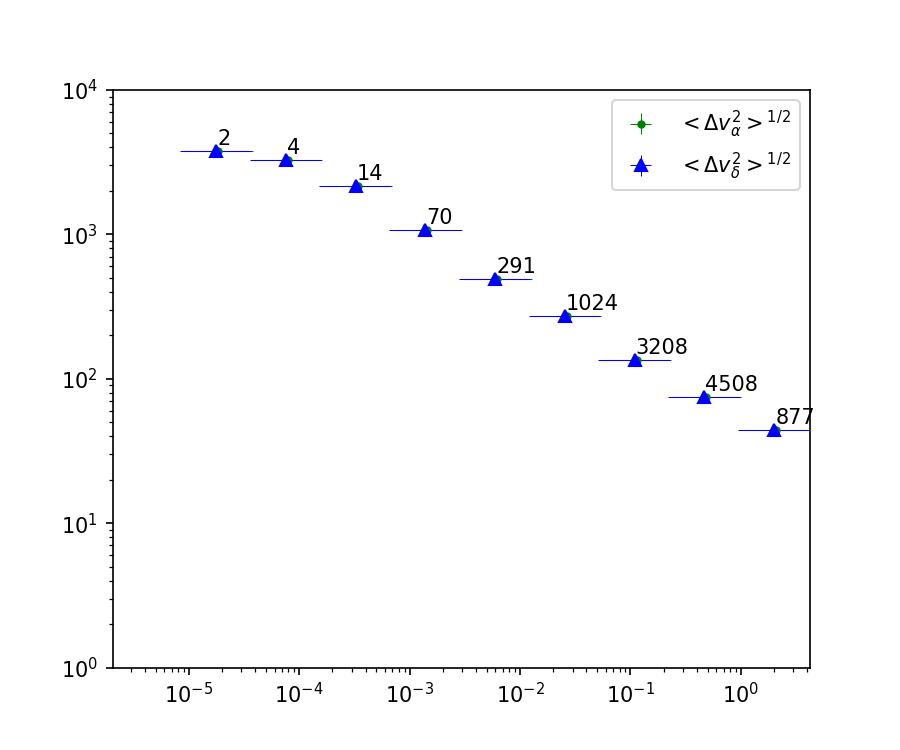

0

In [13]:
#ESTO ES PARA VER QUE ONDA CON EL METODO MONTE CARLO

#data['dvx'] = data.vx2-data.vx1
#data['dvx_err'] = data.vx1_err + data.vx2_err
#data['dvy'] = data.vy2-data.vy1
#data['dvy_err'] = data.vy1_err + data.vy2_err
#data['dvz'] = data.vz2-data.vz1
#data['dvz_err'] = data.vz1_err + data.vz2_err

data['dvx'] = vel.transpose()[0]
data['dvx_err'] = data.vx1_err + data.vx2_err
data['dvy'] = vel.transpose()[1]
data['dvy_err'] = data.vy1_err + data.vy2_err
data['dvz'] = vel.transpose()[2]
data['dvz_err'] = data.vz1_err + data.vz2_err

#rmin,rmax,step,sep,samp_y, rms_y,rms_y_error = \
rmin,rmax,step,sep,samp_x, rms_x,rms_x_error = \
RMS_histogram_1D(data,rmin=False,rmax=False,bins=10,poiss=False,mc=False, N=999,
                     seplabel='xy_sep',vellabel='dvx',velerrlabel='dvx_err')
print(rmin,rmax,step,sep,samp_x, rms_x,rms_x_error)
#rmin,rmax,step,sep,samp_x, rms_x,rms_x_error = \
#rmin,rmax,step,sep,samp_y, rms_y,rms_y_error = \
#RMS_histogram_1D(data,rmin=False,rmax=False,bins=10,poiss=False,mc=False, N=999,
#                     seplabel='zx_sep',vellabel='dvy',velerrlabel='dvy_err')
rmin,rmax,step,sep,samp_y, rms_y,rms_y_error = \
RMS_histogram_1D(data,rmin=False,rmax=False,bins=10,poiss=False,mc=False, N=999,
                 seplabel='xy_sep',vellabel='dvx',velerrlabel='dvx_err')
print(rmin,rmax,step,sep,samp_y, rms_y,rms_y_error)

RMS_histogram(sep,samp_x,step,rms_x,rms_x_error,rms_y,rms_y_error,
                  save='',figname='',fnt=14,xlabl='',ylabl='',
                  _xmin=10**(rmin),
                  _xmax=10**(rmax),
                  _ymin=1,
                  _ymax=1E4,
                  xsolid=[],ysolid=[],
                  showbins=True,
                  MONDline=7000/206000,
              showlegend=True)

In [4]:
#Convertir a coordenadas esfericas
data['dist1'] = np.sqrt(data.x1**2+data.y1**2+data.z1**2)
data['ra1']   = np.rad2deg(np.arctan2(data.y1,data.x1))
data['dec1']  = np.rad2deg(np.arcsin(data.z1/data.dist1))

data['dist2'] = np.sqrt(data.x2**2+data.y2**2+data.z2**2)
data['ra2']   = np.rad2deg(np.arctan2(data.y2,data.x2))
data['dec2']  = np.rad2deg(np.arcsin(data.z2/data.dist2))

#Obtener los movimientos propios y velocidades radiales
#pmra significa pmra*cos(delta), igual que se define en GAIA DR2

data['rv1']    = data.vx1*np.cos(np.deg2rad(data.ra1))*np.cos(np.deg2rad(data.dec1)) + \
                 data.vy1*np.sin(np.deg2rad(data.ra1))*np.cos(np.deg2rad(data.dec1)) + \
                 data.vz1*np.sin(np.deg2rad(data.dec1))
data['pmra1']  = (-data.vx1*np.sin(np.deg2rad(data.ra1)) + \
#                   data.vy1*np.cos(np.deg2rad(data.ra1)))/(kappa*data.dist1*np.cos(np.deg2rad(data.dec1)))
                   data.vy1*np.cos(np.deg2rad(data.ra1)))/(kappa*data.dist1)
data['pmdec1'] = (-data.vx1*np.cos(np.deg2rad(data.ra1))*np.sin(np.deg2rad(data.dec1)) - \
                   data.vy1*np.sin(np.deg2rad(data.ra1))*np.sin(np.deg2rad(data.dec1)) + \
                   data.vz1*np.cos(np.deg2rad(data.dec1)))/(kappa*data.dist1)

data['rv2']    = data.vx2*np.cos(np.deg2rad(data.ra2))*np.cos(np.deg2rad(data.dec2)) + \
                 data.vy2*np.sin(np.deg2rad(data.ra2))*np.cos(np.deg2rad(data.dec2)) + \
                 data.vz2*np.sin(np.deg2rad(data.dec2))
data['pmra2']  = (-data.vx2*np.sin(np.deg2rad(data.ra2)) + \
#                   data.vy2*np.cos(np.deg2rad(data.ra2)))/(kappa*data.dist1*np.cos(np.deg2rad(data.dec2)))
                   data.vy2*np.cos(np.deg2rad(data.ra2)))/(kappa*data.dist1)
data['pmdec2'] = (-data.vx2*np.cos(np.deg2rad(data.ra2))*np.sin(np.deg2rad(data.dec2)) - \
                   data.vy2*np.sin(np.deg2rad(data.ra2))*np.sin(np.deg2rad(data.dec2)) + \
                   data.vz2*np.cos(np.deg2rad(data.dec2)))/(kappa*data.dist2)

#Errores
data['dist1_err'] = 0.001
data['dist2_err'] = 0.001
data['ra1_err'] = 0.04*1E-3*(1/3600)
data['ra2_err'] = 0.04*1E-3*(1/3600)
data['dec1_err'] = 0.04*1E-3*(1/3600)
data['dec2_err'] = 0.04*1E-3*(1/3600)

data['rv1_err'] = 100
data['rv2_err'] = 100

dv = 0.1

data['pmra1_err'] = (dv*1000/kappa - data.dist1_err*data.pmra1)/data.dist1
data['pmra2_err'] = (dv*1000/kappa - data.dist2_err*data.pmra2)/data.dist2
data['pmdec1_err'] = (dv*1000/kappa - data.dist1_err*data.pmdec1)/data.dist1
data['pmdec2_err'] = (dv*1000/kappa - data.dist2_err*data.pmdec2)/data.dist2

#data['pmra1_err'] = 0.04*1E-3*(1/3600)
#data['pmra2_err'] = 0.04*1E-3*(1/3600)
#data['pmdec1_err'] = 0.04*1E-3*(1/3600)
#data['pmdec2_err'] = 0.04*1E-3*(1/3600)

#data['pmra2_corr'],data['pmdec2_corr'],data['rv2_corr'] = data.pmra2,data.pmdec2,data.rv2

#data['pmra2_corr'],data['pmdec2_corr'],data['rv2_corr'],U,V,W = spherical_corr(data.ra2,data.dec2,data.dist2,data.pmra2,data.pmdec2,data.rv2*1E-3,data.ra1,data.dec1)
data['pmra2_corr'],data['pmdec2_corr'],data['rv2_corr'] = \
spherical_corr(data.ra2,data.dec2,data.dist2,data.pmra2,data.pmdec2,data.rv2*1E-3,
               data.ra1,data.dec1,
               data.vx2*1E-3,data.vy2*1E-3,data.vz2*1E-3)
data.rv2_corr = data.rv2_corr*1000

#data.pmra2_corr = data.pmra2_corr*np.cos(np.deg2rad(data.dec1))
#data.pmra1 = data.pmra1*np.cos(np.deg2rad(data.dec1))

#Separacion proyectada
data['proy_sep'] = R3D(0.5*(data.dist1+data.dist2),0.5*(data.dist1+data.dist2),
                          cos_distang(data.ra1,data.dec1,data.ra2,data.dec2))

#Velocidades
#C = kappa*1E-3*data.dist2
#data['U'] = -C*data.pmra2*np.sin(np.deg2rad(data.ra2)) \
#            -C*data.pmdec2*np.cos(np.deg2rad(data.ra2))*np.sin(np.deg2rad(data.dec2)) \
#            +data.rv2*np.cos(np.deg2rad(data.ra2))*np.cos(np.deg2rad(data.dec2))
#
#data['V'] = C*data.pmra2*np.cos(np.deg2rad(data.ra2)) \
#           -C*data.pmdec2*np.sin(np.deg2rad(data.ra2))*np.sin(np.deg2rad(data.dec2)) \
#           +data.rv2*np.sin(np.deg2rad(data.ra2))*np.cos(np.deg2rad(data.dec2))
#
#data['W'] = C*data.pmdec2*np.cos(np.deg2rad(data.dec2)) \
#           +data.rv2*np.sin(np.deg2rad(data.dec2))

In [12]:
# Testing back and forth spherical correction
corr_pmra,corr_pmdec,corr_rv,_dump,_dump,_dump = \
spherical_corr(data.ra2,data.dec2,data.dist2,
               data.pmra2,data.pmdec2,data.rv2,
               data.ra1,data.dec1)
new_pmra2,new_pmdec2,new_rv2,_dump,_dump,_dump = \
spherical_corr(data.ra1,data.dec1,data.dist2,
               corr_pmra,corr_pmdec,corr_rv,
               data.ra2,data.dec2)

In [13]:
data['dv_ra']  = np.abs(1E-3*kappa*(data.pmra2_corr*data.dist2 - data.pmra1*data.dist1))
((data[(0.01 < data.proy_sep )&
     (data.proy_sep < 0.1)].dv_ra)**2).describe()



count    134.000000
mean       0.042845
std        0.068496
min        0.000007
25%        0.003995
50%        0.014163
75%        0.053591
max        0.471065
Name: dv_ra, dtype: float64

<IPython.core.display.Javascript object>


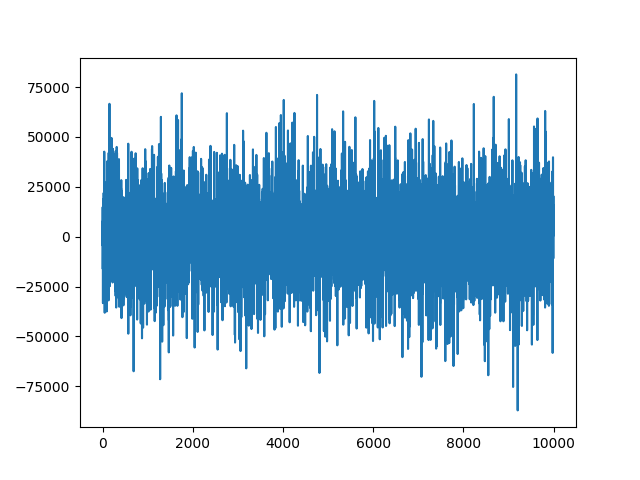

In [14]:
#data.plot.scatter('ra1','dec1',0.1),data.plot.scatter('ra2','dec2')
plt.plot(data.vx2-data.U)
#plt.plot(data.vy2-data.V)
#plt.plot(data.vz2-data.W)

In [8]:
data.columns

Index(['x1', 'y1', 'z1', 'vx1', 'vy1', 'vz1', 'x2', 'y2', 'z2', 'vx2', 'vy2',
       'vz2', 'xy_sep', 'yz_sep', 'zx_sep', 'dvx', 'dvy', 'dvz', 'x1_err',
       'y1_err', 'z1_err', 'vx1_err', 'vy1_err', 'vz1_err', 'x2_err', 'y2_err',
       'z2_err', 'vx2_err', 'vy2_err', 'vz2_err', 'dvx_err', 'dvy_err',
       'dvz_err', 'dist1', 'ra1', 'dec1', 'dist2', 'ra2', 'dec2', 'rv1',
       'pmra1', 'pmdec1', 'rv2', 'pmra2', 'pmdec2', 'dist1_err', 'dist2_err',
       'ra1_err', 'ra2_err', 'dec1_err', 'dec2_err', 'rv1_err', 'rv2_err',
       'pmra1_err', 'pmra2_err', 'pmdec1_err', 'pmdec2_err', 'pmra2_corr',
       'pmdec2_corr', 'rv2_corr', 'proy_sep', 'U', 'V', 'W'],
      dtype='object')

/home/rcortes/MEGA/MEGAsync/Documentos/ASTRO/Doctorado/2o_semestre/CANARIAS_GAIA/ElBadry-Rix/binaries.py:437: RuntimeWarning: Mean of empty slice.
  (np.random.normal(_temp[vellabel],_temp[velerrlabel])**2).mean()))
/home/rcortes/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


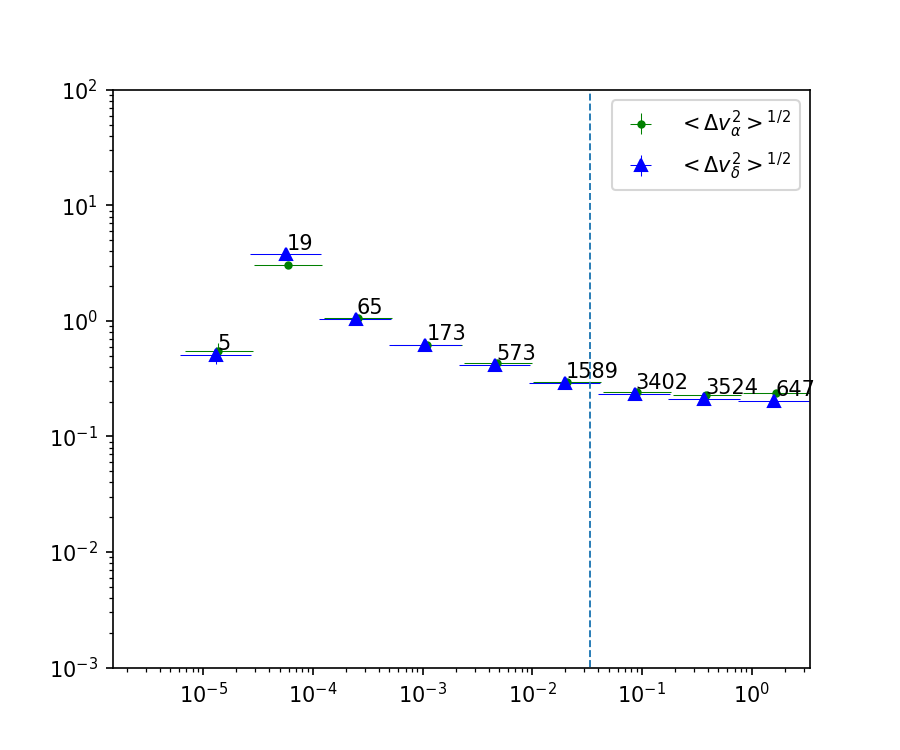

/home/rcortes/.local/lib/python3.6/site-packages/numpy/ma/core.py:6718: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


0

In [5]:
rmin,rmax,step,sep, samp_ra,samp_dec, rms_ra,rms_ra_error,rms_dec,rms_dec_error, l =\
make_histogram_spherical(data,bins=10,poiss=False,make_correction=False)
RMS_histogram(sep,samp_ra,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
                  save='',figname='',fnt=14,xlabl='',ylabl='',
                  _xmin=10**(rmin),
                  _xmax=10**(rmax),
                  _ymin=1E-3,
                  _ymax=1E2,
                  xsolid=[],ysolid=[],
                  showbins=True,
                  MONDline=7000/206000,
              showlegend=True)

/home/rcortes/MEGA/MEGAsync/Documentos/ASTRO/Doctorado/2o_semestre/CANARIAS_GAIA/ElBadry-Rix/binaries.py:438: RuntimeWarning: Mean of empty slice.
  (np.random.normal(_temp[vellabel],_temp[velerrlabel])**2).mean()))
/home/rcortes/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


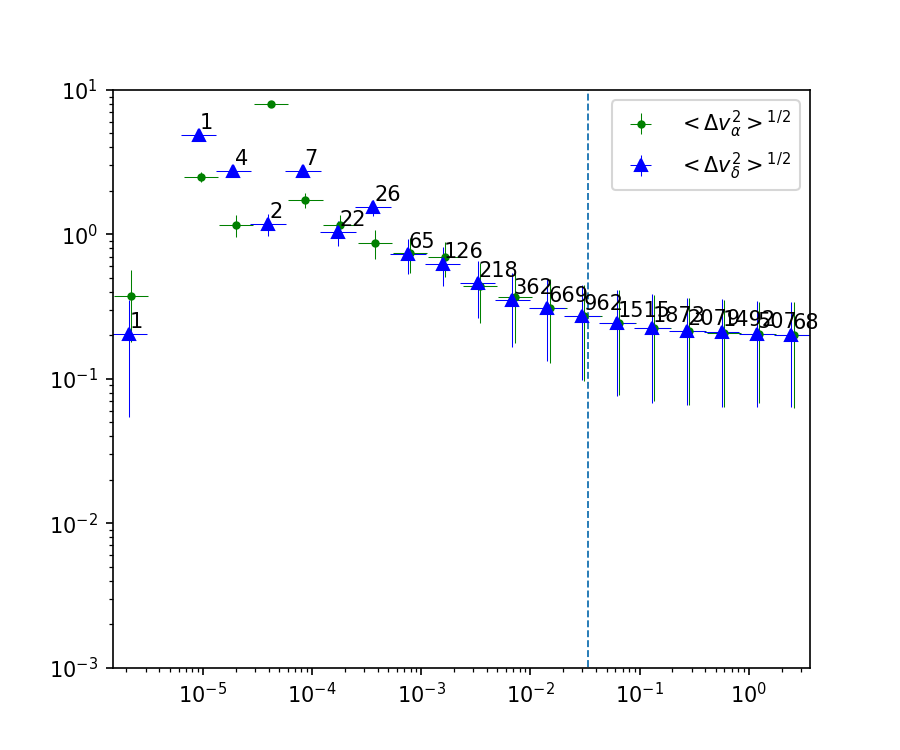

0

In [7]:
rmin,rmax,step,sep, samp_ra,samp_dec, rms_ra,rms_ra_error,rms_dec,rms_dec_error, l =\
make_histogram_spherical(data,bins=20,poiss=True)
RMS_histogram(sep,samp_ra,step,rms_ra,rms_ra_error,rms_dec,rms_dec_error,
                  save='',figname='',fnt=14,xlabl='',ylabl='',
                  _xmin=10**(rmin),
                  _xmax=10**(rmax),
                  _ymin=1E-3,
                  _ymax=1E1,
                  xsolid=[],ysolid=[],
                  showbins=True,
                  MONDline=7000/206000,
              showlegend=True)

In [15]:
data.std?

<IPython.core.display.Javascript object>


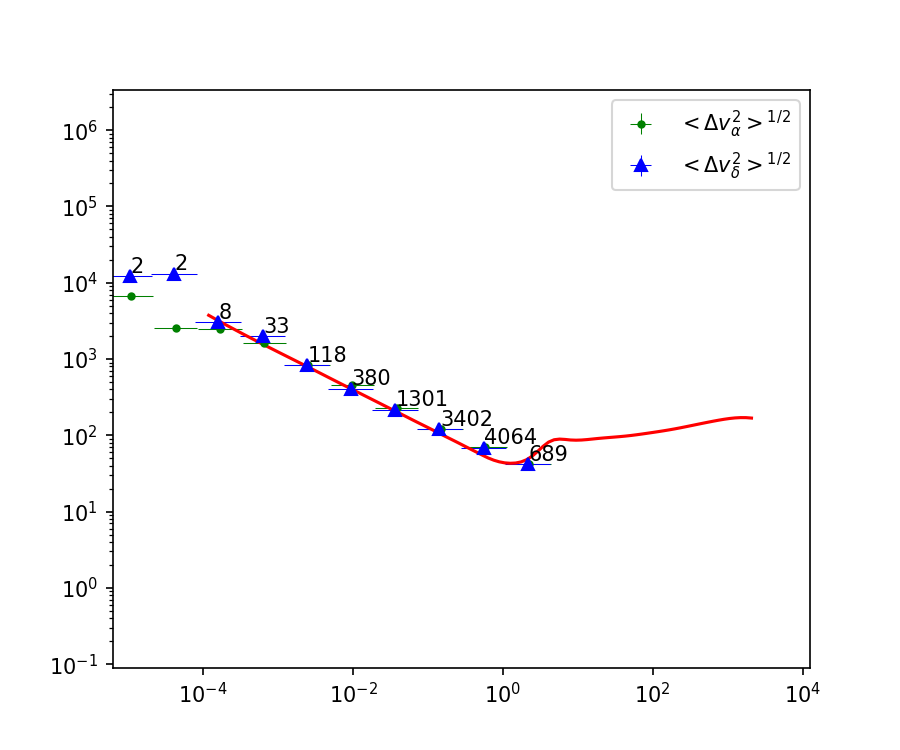

0

In [13]:
rmin,rmax,step, sep,samp_x,samp_y,samp_z, rms_x,rms_x_error,rms_y,rms_y_error,rms_z,rms_z_error, l =\
make_histogram_XYZ(data,bins=10)
RMS_histogram(sep,samp_x,step,rms_x,rms_x_error,rms_y,rms_y_error,
                  save='',figname='',fnt=14,xlabl='',ylabl='',
                  _xmin=10**(rmin),
                  _xmax=10**(rmax),
                  _ymin=1,
                  _ymax=1E4,
              xsolid=rjacobi*10**(xspan),
              ysolid=1E3*Omega_g_rj*10**(f2(xspan)),
                  showbins=True,
                  MONDline=7000/206000,
                 showlegend=True)

In [36]:
pd.DataFrame(np.transpose([data['vx1'],data['vx1_err'],np.random.normal(data['vx1'],data['vx1_err'])**2]))

,0,1,2
0,-41122.944611,50.0,1.686340e+09
1,-12725.038931,50.0,1.626719e+08
2,-4974.191495,50.0,2.466846e+07
3,-8613.844860,50.0,7.471659e+07
4,170.768857,50.0,4.178082e+04
5,-5641.435579,50.0,3.150694e+07
6,13091.914730,50.0,1.702240e+08
7,20170.412702,50.0,4.067972e+08
8,-2189.855606,50.0,4.663126e+06
9,14503.874662,50.0,2.092812e+08


<IPython.core.display.Javascript object>


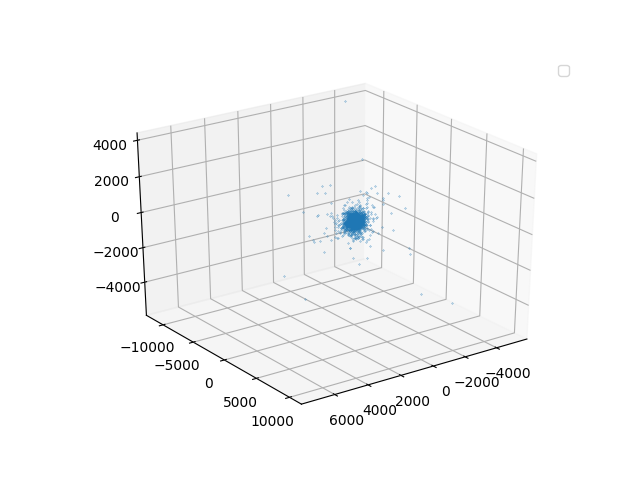

No handles with labels found to put in legend.


In [56]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#import numpy as np
#import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

x,y,z=data.x1,data.y1,data.z1
#x,y,z=vel.transpose()
#x,y,z=pri_pos.transpose()
x1,y1,z1=sec_pos.transpose()
#x,y,z=pri_vel.transpose()
#x1,y1,z1=sec_vel.transpose()
#vx,vy,vz=vel.transpose()
#vnorm = [np.sqrt(np.dot(x,x)) for x in vel]

#vx,vy,vz=vel.transpose()
#vnorm = [np.sqrt(np.dot(x,x)) for x in vel]

vx,vy,vz=data.dvx,data.dvy,data.dvz
vnorm = 1
#vnorm = [np.sqrt(np.dot(x,x)) for x in np.transpose([data.dvx,data.dvy,data.dvz])]


ax.legend()
#ax.plot(x, y, z,'.',label='parametric curve')
#ax.plot(x1, y1, z1,'.')
ax.plot(vx/vnorm,
        vy/vnorm,
        vz/vnorm,'.',ms=0.5)

#ax.plot(data.x1,
#        data.y1,
#        data.z1,'.',ms=0.5)
#ax.plot(data.x2,
#        data.y2,
#        data.z2,'.',ms=0.5)

#ax.plot(data.vx1,
#        data.vy1,
#        data.vz1,'.',ms=0.5)
#ax.plot(data.vx2,
#        data.vy2,
#        data.vz2,'.',ms=0.5)

plt.show()

In [46]:
[np.sqrt(np.dot(x,x)) for x in vel]

[199.46619357296268,
 330.4943680428911,
 179.56443820638188,
 152.2746280855941,
 109.14948487070899,
 148.08870571963246,
 3763.891764435394,
 137.73578946218592,
 224.67969090564847,
 190.3236821922479,
 174.7426198282244,
 147.22198883437423,
 192.314374498199,
 171.03939941579893,
 81.39317603156081,
 104.27898077135445,
 282.3711553681074,
 132.53534929301466,
 105.20137556110504,
 121.89710991467923,
 155.5768051166067,
 248.6913461943278,
 91.26725089165976,
 89.29540398568639,
 84.83162552420166,
 126.70678729082019,
 111.14799623004002,
 178.82503181253227,
 262.7560666445499,
 113.01966048314628,
 210.98903602009835,
 220.75618931800855,
 205.86144846482875,
 91.28450188886957,
 123.15850036876817,
 339.9103161765159,
 202.91957788024934,
 133.99318871475393,
 283.7682145262252,
 166.1039896137548,
 80.5403740532538,
 190.88692540027915,
 132.7675482643369,
 194.85210621850732,
 301.2044488390189,
 235.78863166044385,
 239.17683006200517,
 90.55013639718565,
 118.57439269325

<IPython.core.display.Javascript object>


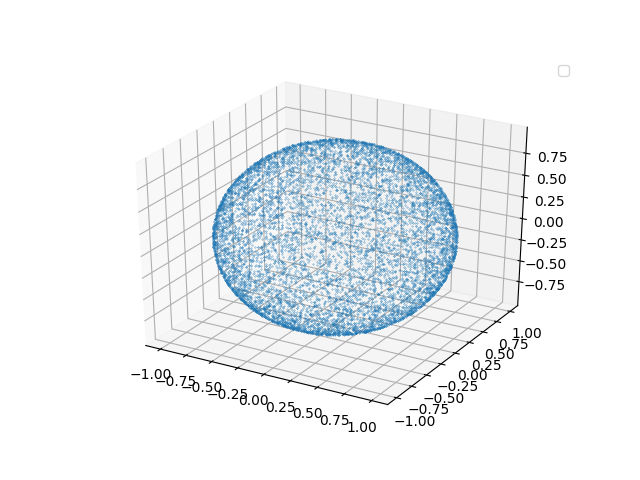

No handles with labels found to put in legend.


In [89]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#import numpy as np
#import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

#x,y,z = pos.transpose()
#x,y,z=data.x1,data.y1,data.z1
#x,y,z=vel.transpose()
#x,y,z=pri_pos.transpose()
#x1,y1,z1=sec_pos.transpose()
x,y,z=pri_vel.transpose()
vnorm = [np.sqrt(np.dot(x,x)) for x in pri_vel]
#x1,y1,z1=sec_vel.transpose()
#vx,vy,vz=vel.transpose()
#vnorm = [np.sqrt(np.dot(x,x)) for x in vel]

#vx,vy,vz=vel.transpose()
#vnorm = [np.sqrt(np.dot(x,x)) for x in vel]

#vx,vy,vz=data.dvx,data.dvy,data.dvz
#vnorm = 1
#vnorm = [np.sqrt(np.dot(x,x)) for x in np.transpose([data.dvx,data.dvy,data.dvz])]


ax.legend()
ax.plot(x/vnorm, y/vnorm, z/vnorm,'.',ms=0.5)
#ax.plot(vx, vy, vz,'.',ms=0.5)
#ax.plot(x1, y1, z1,'.')
#ax.plot(vx/vnorm,
#        vy/vnorm,
#        vz/vnorm,'.',ms=0.5)

#ax.plot(data.x1,
#        data.y1,
#        data.z1,'.',ms=0.5)
#ax.plot(data.x2,
#        data.y2,
#        data.z2,'.',ms=0.5)

#ax.plot(data.vx1,
#        data.vy1,
#        data.vz1,'.',ms=0.5)
#ax.plot(data.vx2,
#        data.vy2,
#        data.vz2,'.',ms=0.5)

plt.show()